In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
"""Make sure that you add to the args dict the following params:
args_dict = {         
+        'view': 'sagittal',
+        'task': 'abnormal',
"""

"""
I also removed the following decorator:

-@memory.cache
 def get_model_and_loader(model_path, dataset):
"""

import evaluate.predict as predict
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import cv2
import matplotlib
matplotlib.rcParams['figure.figsize'] = (16, 10)

In [3]:
### abnormal
ab_cor = ('nbien-full-dataset/1521632177_abnormal_coronal_alexnet_coronal/val0.1570933759212494_train0.12708044052124023_epoch11', 'coronal')
ab_sag = ('nbien-full-dataset/1521632163_abnormal_sagittal_alexnet_sagittal/val0.10419943183660507_train0.09963367879390717_epoch13', 'sagittal')
ab_ax = ('nbien-full-dataset/1521632186_abnormal_axial_alexnet_axial/val0.10126200318336487_train0.10181700438261032_epoch14', 'axial')
### meniscus
men_cor = ('nbien-full-dataset/1521633002_meniscus_coronal_alexnet_coronal/val0.27041077613830566_train0.18067286908626556_epoch24', 'coronal')
men_sag = ('aaa_mr_knee_experiments/1521740841_meniscus_sagittal_alexnet_regularize_more/val0.27458277344703674_train0.22643214464187622_epoch16', 'sagittal')
men_ax = ('nbien-full-dataset/1521633053_meniscus_axial_alexnet_axial/val0.2577749490737915_train0.18979603052139282_epoch29', 'axial')
### acl
acl_cor = ('nbien-full-dataset/1521633273_acl_coronal_alexnet_coronal/val0.189946249127388_train0.1195748895406723_epoch19', 'coronal')
#acl_sag = ('nbien-full-dataset/1521633210_acl_sagittal_alexnet_sagittal/val0.21643468737602234_train0.12244126200675964_epoch23','sagittal')
acl_sag = ('aaa_mr_knee_experiments/1521763511_acl_sagittal_alexnet_smaller_lr/val0.21529681980609894_train0.11293011158704758_epoch35', 'sagittal')
acl_ax = ('nbien-full-dataset/1521633347_acl_axial_alexnet_axial/val0.13460037112236023_train0.08850131183862686_epoch47','axial')

In [4]:
import utils
model_path = '/deep/group/aihc-bootcamp-winter2018/medical-imaging/mr_knee_abnormality/models/' +\
            acl_sag[0]
dataset = 'valid'
view = acl_sag[1]
model, loader = utils.get_model_and_loader(model_path, dataset)

---Retrieved model args
---Loading data
Task acl
/deep/group/aihc-bootcamp-winter2018/medical-imaging/mr_knee_abnormality/data-final/train.csv
Abnormal counts: Counter({1: 913, 0: 217})
ACL counts: Counter({0: 922, 1: 208})
Meniscus counts: Counter({0: 733, 1: 397})
Task acl
/deep/group/aihc-bootcamp-winter2018/medical-imaging/mr_knee_abnormality/data-final/valid.csv
Abnormal counts: Counter({1: 95, 0: 25})
ACL counts: Counter({0: 66, 1: 54})
Meniscus counts: Counter({0: 68, 1: 52})
Task acl
/deep/group/aihc-bootcamp-winter2018/medical-imaging/mr_knee_abnormality/data-final/test.csv
Abnormal counts: Counter({1: 96, 0: 24})
ACL counts: Counter({0: 63, 1: 57})
Meniscus counts: Counter({0: 61, 1: 59})
Task acl
---Data loading complete
---Loading state dict
---Loading model


In [4]:
import utils
model_path = '/deep/group/aihc-bootcamp-winter2018/medical-imaging/mr_knee_abnormality/models/nbien-full-dataset/' +\
            ab_sag[0]
dataset = 'valid'
view = ab_sag[1]
model, loader = utils.get_model_and_loader(model_path, dataset)


---Retrieved model args
---Loading data
Task abnormal
/deep/group/aihc-bootcamp-winter2018/medical-imaging/mr_knee_abnormality/data-final/train.csv
Abnormal counts: Counter({1: 913, 0: 217})
ACL counts: Counter({0: 922, 1: 208})
Meniscus counts: Counter({0: 733, 1: 397})
Task abnormal
/deep/group/aihc-bootcamp-winter2018/medical-imaging/mr_knee_abnormality/data-final/valid.csv
Abnormal counts: Counter({1: 95, 0: 25})
ACL counts: Counter({0: 66, 1: 54})
Meniscus counts: Counter({0: 68, 1: 52})
Task abnormal
/deep/group/aihc-bootcamp-winter2018/medical-imaging/mr_knee_abnormality/data-final/test.csv
Abnormal counts: Counter({1: 96, 0: 24})
ACL counts: Counter({0: 63, 1: 57})
Meniscus counts: Counter({0: 61, 1: 59})
Task abnormal
---Data loading complete
---Loading state dict
---Loading model


In [5]:
positive_examples = []
examples = []

for index, batch in enumerate(loader):
    batch_inputs, labels = utils.transform_data(batch, use_gpu=True)
    if labels.cpu().data[0].numpy()[0] == 1:
        positive_examples.append((batch_inputs, batch, index))
    examples.append((batch_inputs, batch, index))

In [6]:
for i in range(15,30):
    batch_inputs_chosen, batch_chosen, index = positive_examples[i]
    #batch_inputs_chosen, batch_chosen, index = examples[5]
    batch_logits = model(batch_inputs_chosen[view])
    print(i)
    print(index)
    print(batch_logits)

15
39
Variable containing:
 4.7075
[torch.cuda.FloatTensor of size 1x1 (GPU 0)]

16
40
Variable containing:
 4.4035
[torch.cuda.FloatTensor of size 1x1 (GPU 0)]

17
41
Variable containing:
 3.9801
[torch.cuda.FloatTensor of size 1x1 (GPU 0)]

18
42
Variable containing:
 2.8452
[torch.cuda.FloatTensor of size 1x1 (GPU 0)]

19
43
Variable containing:
 2.0093
[torch.cuda.FloatTensor of size 1x1 (GPU 0)]

20
44
Variable containing:
 4.9258
[torch.cuda.FloatTensor of size 1x1 (GPU 0)]

21
45
Variable containing:
 1.3166
[torch.cuda.FloatTensor of size 1x1 (GPU 0)]

22
46
Variable containing:
 4.4117
[torch.cuda.FloatTensor of size 1x1 (GPU 0)]

23
47
Variable containing:
 2.0211
[torch.cuda.FloatTensor of size 1x1 (GPU 0)]

24
48
Variable containing:
 0.1381
[torch.cuda.FloatTensor of size 1x1 (GPU 0)]

25
49
Variable containing:
 2.2974
[torch.cuda.FloatTensor of size 1x1 (GPU 0)]

26
50
Variable containing:
 1.7431
[torch.cuda.FloatTensor of size 1x1 (GPU 0)]

27
51
Variable containing:
 

In [13]:
cams = []

def hook_feature(module, input, output):
    cams.append(output.data.cpu().numpy())

model.model._modules.get('features').register_forward_hook(hook_feature)

batch_inputs_chosen, batch_chosen, index = positive_examples[20]
batch_logits = model(batch_inputs_chosen[view])
print(index)
print(batch_logits)

44
Variable containing:
 4.9258
[torch.cuda.FloatTensor of size 1x1 (GPU 0)]



<class 'numpy.uint8'>


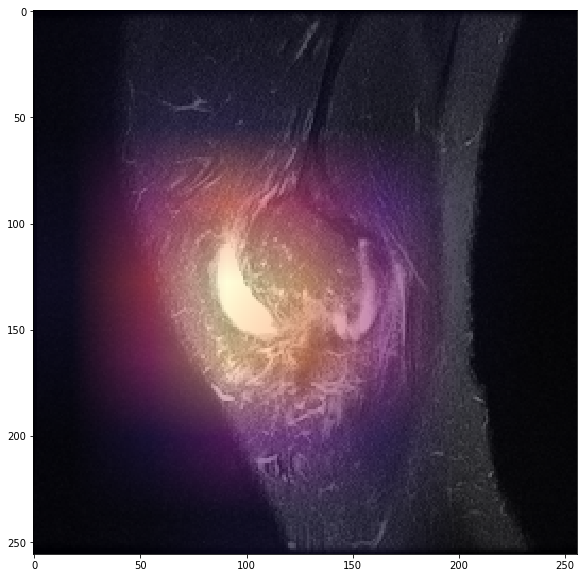

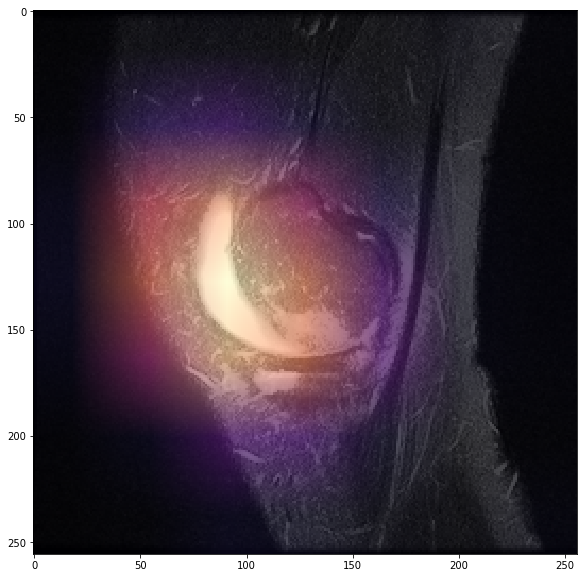

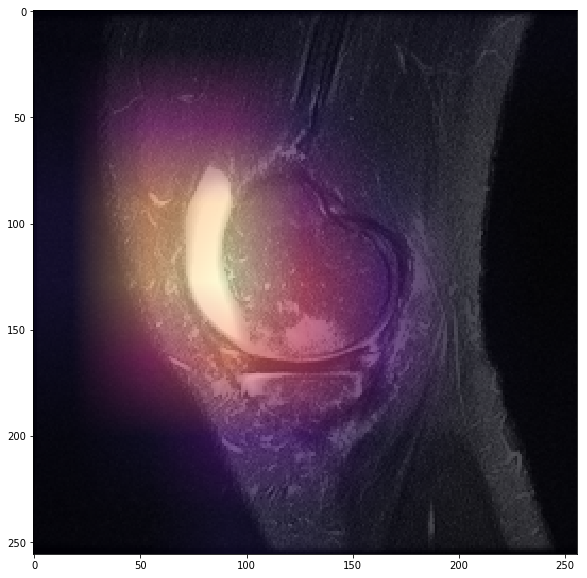

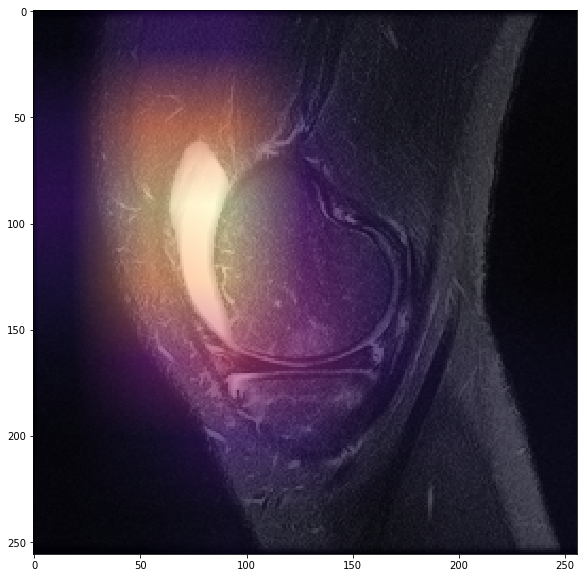

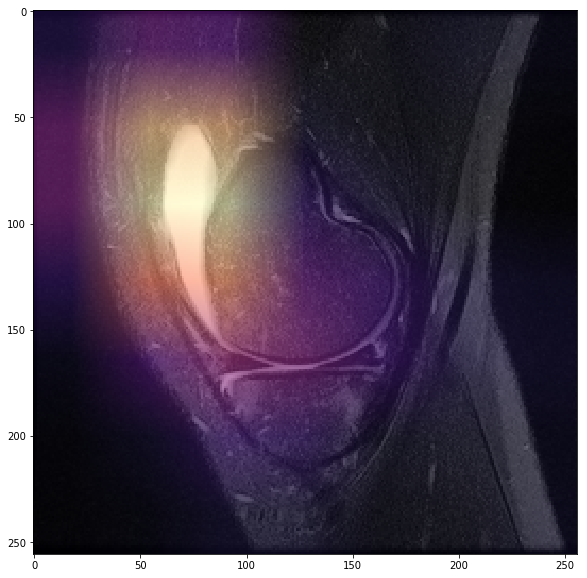

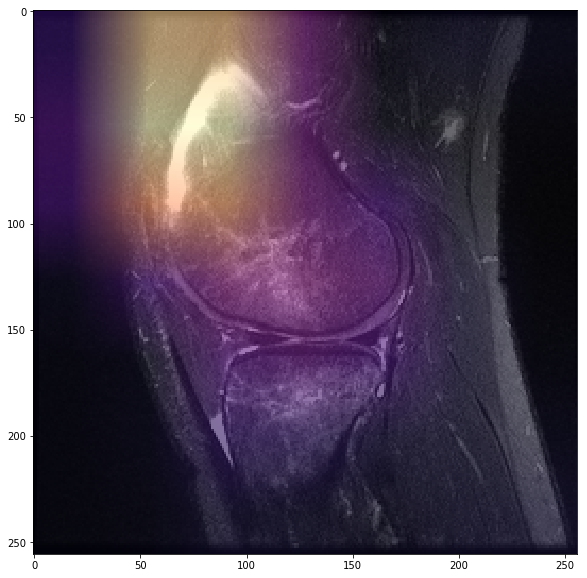

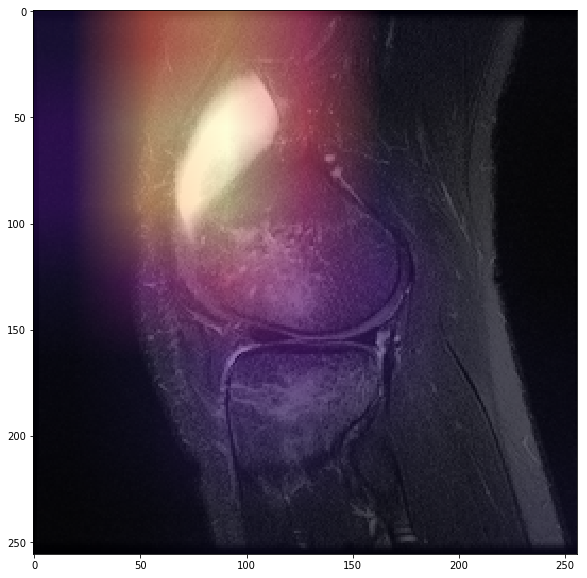

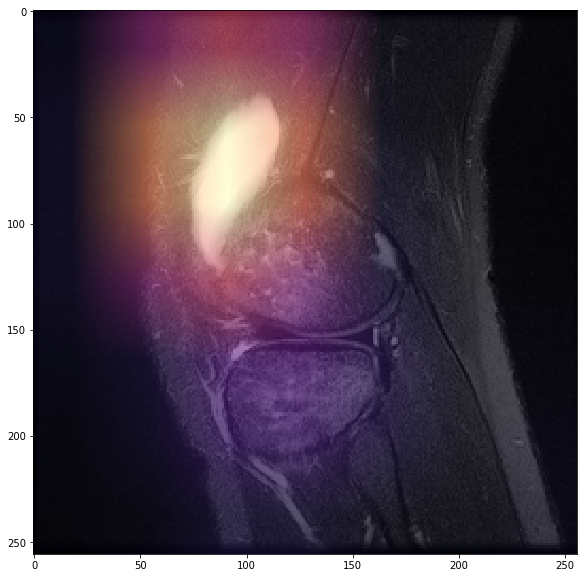

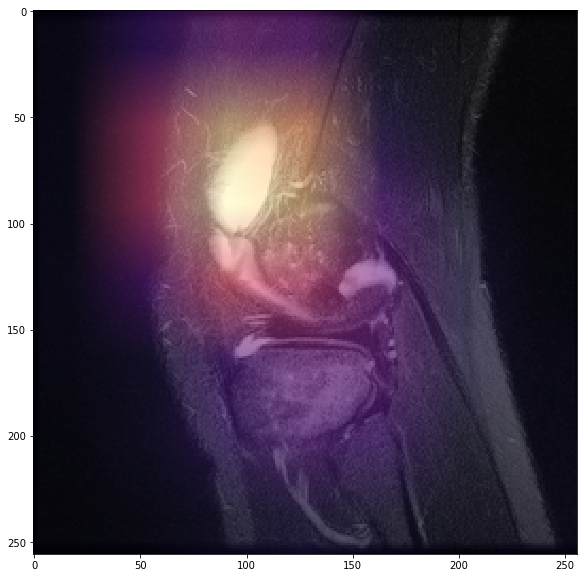

In [15]:
def get_cam(cam_samp, weighted=None):
    # weighted didn't work well
    if weighted:
        dot_product = weight_softmax.dot(cam_samp.reshape(cam_samp.shape[0], -1))
        cam_samp_averaged = dot_product.reshape((cam_samp.shape[1], cam_samp.shape[2]))
    else:
        cam_samp_averaged = np.mean(cam_samp, axis=0)
    
    ## currently arbitrary. TODO: change to a proper threshold
    if np.max(cam_samp_averaged) < 5: return None

    cmap = plt.get_cmap('magma')
    class_cam = cam_samp_averaged
    class_cam = class_cam - np.min(class_cam)
    class_cam = (class_cam / np.max(class_cam) * 255).astype('int')
    class_cam = cmap(class_cam)[:, :, :3]
    return class_cam

weight_softmax = np.squeeze(list(model.parameters())[-2].data.cpu().numpy())
unnormalized_images = loader.dataset.unnormalize(batch_chosen[0][view][0].cpu().data.numpy())
for index_chosen in range(int(len(unnormalized_images))):
    sample_image = unnormalized_images[index_chosen]
    sample_image = np.swapaxes(sample_image, 0, 2)
    sample_image = np.swapaxes(sample_image, 1, 0)
    sample_image = sample_image / sample_image.max()
    
    weighted = False
    cam_samp = cams[0][index_chosen]

    class_cam = get_cam(cam_samp, weighted=weighted)
    if class_cam is None: continue
    class_cam = cv2.resize(class_cam, (sample_image.shape[0], sample_image.shape[1]))

    merge = 0.4*sample_image + 0.6*class_cam
    merge_normalized = merge / merge.max()
    
    #plt.figure()
    #plt.imshow(class_cam)
    #plt.figure()
    #plt.imshow(sample_image)
    plt.figure()
    plt.imshow(merge_normalized)

In [29]:
print(batch_chosen[0]['coronal'][0].size())

KeyError: 'coronal'

In [30]:
print(unnormalized_images.shape)

(46, 3, 256, 256)


In [31]:
print(len(unnormalized_images))

46


In [33]:
print(unnormalized_images[0])

[[[0 0 1 ... 0 0 0]
  [1 2 1 ... 0 0 0]
  [2 2 2 ... 0 0 0]
  ...
  [0 3 3 ... 0 0 0]
  [0 1 1 ... 0 0 0]
  [0 0 1 ... 0 0 0]]

 [[0 0 1 ... 0 0 0]
  [1 2 1 ... 0 0 0]
  [2 2 2 ... 0 0 0]
  ...
  [0 3 3 ... 0 0 0]
  [0 1 1 ... 0 0 0]
  [0 0 1 ... 0 0 0]]

 [[0 0 1 ... 0 0 0]
  [1 2 1 ... 0 0 0]
  [2 2 2 ... 0 0 0]
  ...
  [0 3 3 ... 0 0 0]
  [0 1 1 ... 0 0 0]
  [0 0 1 ... 0 0 0]]]
